In [2]:
import yfinance as yf
import pandas as pd
import json
import datetime

In [2]:
msci = yf.Ticker("^990100-USD-STRD")

In [3]:
fast_info = json.loads(msci.fast_info.toJSON())

Just check the fast info of the ticker

In [4]:
fast_info

{'currency': None,
 'dayHigh': 3661.5400390625,
 'dayLow': 3594.56005859375,
 'exchange': 'MSC',
 'fiftyDayAverage': 3556.3439048208843,
 'lastPrice': 3594.56005859375,
 'lastVolume': 0,
 'marketCap': None,
 'open': 3659.52001953125,
 'previousClose': 3661.239990234375,
 'quoteType': 'INDEX',
 'regularMarketPreviousClose': nan,
 'shares': None,
 'tenDayAverageVolume': 0,
 'threeMonthAverageVolume': 0,
 'timezone': 'America/New_York',
 'twoHundredDayAverage': 3410.2189107755335,
 'yearChange': nan,
 'yearHigh': 3661.199951171875,
 'yearLow': 2724.89990234375}

We can check the history metadata which gives us some insights about the data. 

In [5]:
msci.history_metadata

{'currency': None,
 'symbol': '^990100-USD-STRD',
 'exchangeName': 'MSC',
 'fullExchangeName': 'MSCI',
 'instrumentType': 'INDEX',
 'firstTradeDate': 63262800,
 'regularMarketTime': 1725392130,
 'hasPrePostMarketData': False,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 3594.56,
 'fiftyTwoWeekHigh': 3661.54,
 'fiftyTwoWeekLow': 3594.56,
 'regularMarketDayHigh': 3661.54,
 'regularMarketDayLow': 3594.56,
 'longName': 'MSCI WORLD',
 'shortName': 'MSCI WORLD',
 'chartPreviousClose': 3631.2,
 'previousClose': 3659.44,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'end': 1725336000,
   'start': 1725336000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'end': 1725422340,
   'start': 1725336000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'end': 1725422340,
   'start': 1725422340,
   'gmtoffset': -14400}},
 'tradingPeriods': {'pre': [[{'timezone': 'EDT',
     'e

Checking the firstTradeDate attribute.

In [6]:
ftd = msci.history_metadata.get("firstTradeDate")

datetime.datetime.fromtimestamp(63262800)

datetime.datetime(1972, 1, 3, 6, 0)

Or we can just use the info method 😆

In [7]:
msci.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 3659.44,
 'open': 3659.52,
 'dayLow': 3594.56,
 'dayHigh': 3661.54,
 'regularMarketPreviousClose': 3659.44,
 'regularMarketOpen': 3659.52,
 'regularMarketDayLow': 3594.56,
 'regularMarketDayHigh': 3661.54,
 'fiftyTwoWeekLow': 2372.9,
 'fiftyTwoWeekHigh': 3661.54,
 'fiftyDayAverage': 2636.322,
 'twoHundredDayAverage': 2804.1274,
 'exchange': 'MSC',
 'quoteType': 'INDEX',
 'symbol': '^990100-USD-STRD',
 'underlyingSymbol': '^990100-USD-STRD',
 'shortName': 'MSCI WORLD',
 'longName': 'MSCI WORLD',
 'firstTradeDateEpochUtc': 63262800,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': 'f1f69aa1-fc8c-3c11-b128-30a7a50a6641',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': None}

In [8]:
msci

yfinance.Ticker object <^990100-USD-STRD>

We can just download the full history of the index using the history method of the msci ticker. 
To not send too much requests, we can just write the data into parquet. This is just a good practice in this special case does not really matter beacuse we are working with only one ticker with limited amount of rows (~14k)

In [9]:
df = msci.history(period="max")

In [3]:
import os
from pathlib import Path
result_path = Path("data/msci_world_index.parquet")

if not os.path.exists(result_path):
    os.mkdir(result_path.parent)
    df.to_parquet(result_path)

In [4]:
df = pd.read_parquet(result_path)

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-01-03 00:00:00-05:00,104.300003,104.300003,104.300003,104.300003,0,0.0,0.0
1972-01-04 00:00:00-05:00,104.599998,104.599998,104.599998,104.599998,0,0.0,0.0
1972-01-05 00:00:00-05:00,105.599998,105.599998,105.599998,105.599998,0,0.0,0.0
1972-01-06 00:00:00-05:00,110.800003,110.800003,110.800003,110.800003,0,0.0,0.0
1972-01-07 00:00:00-05:00,110.900002,110.900002,110.900002,110.900002,0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13494 entries, 1972-01-03 00:00:00-05:00 to 2024-09-03 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          13494 non-null  float64
 1   High          13494 non-null  float64
 2   Low           13494 non-null  float64
 3   Close         13494 non-null  float64
 4   Volume        13494 non-null  int64  
 5   Dividends     13494 non-null  float64
 6   Stock Splits  13494 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 843.4 KB


- [ ] identify holidays
- [ ] convert date to datetime

- [ ] using only the close price
- [ ] add day of month as column
- [ ] add holidays
- [ ] create saving plan with pandas
- [ ] get value diff $ v_{tomorrow} - v_{today} $

In [27]:
df.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-01-03 00:00:00-05:00,104.300003,104.300003,104.300003,104.300003,0,0.0,0.0
1972-01-04 00:00:00-05:00,104.599998,104.599998,104.599998,104.599998,0,0.0,0.0
1972-01-05 00:00:00-05:00,105.599998,105.599998,105.599998,105.599998,0,0.0,0.0
1972-01-06 00:00:00-05:00,110.800003,110.800003,110.800003,110.800003,0,0.0,0.0
1972-01-07 00:00:00-05:00,110.900002,110.900002,110.900002,110.900002,0,0.0,0.0
1972-01-10 00:00:00-05:00,110.500000,110.500000,110.500000,110.500000,0,0.0,0.0
1972-01-11 00:00:00-05:00,111.000000,111.000000,111.000000,111.000000,0,0.0,0.0
1972-01-12 00:00:00-05:00,111.199997,111.199997,111.199997,111.199997,0,0.0,0.0
1972-01-13 00:00:00-05:00,110.699997,110.699997,110.699997,110.699997,0,0.0,0.0


# Data Preparation 

In [669]:
from typing import Union, Tuple
import numpy as np

class SavingPlan:
    def __init__(self, 
                 df: pd.DataFrame,
                 invest_amount: int,
                 day_to_invest: int,
                 period: Union[str, Tuple[datetime.datetime, datetime.datetime]]):
        self.df = df
        self.invest_amount = invest_amount
        self.day_to_invest = day_to_invest
        self.period = period

        if isinstance(self.period, str):
            assert self.period == "max", "If using string the only available value is 'max'"
    
        self.df = df

        if self.df.index.tz:
            self.df.index = self.df.index.tz_convert(None)

        if isinstance(self.period, tuple):
            self.df = self.df.loc[self.period[0]: self.period[1]]
            
    
        self.close_column = "Close"

        self.prepared_df = self.prepare_data()

        self._total_worth = None

    @property
    def total_worth(self):
        if self._total_worth is None:
            self._total_worth = self.prepared_df.tail(1)["total_worth"].iloc[0].item()
        return self._total_worth

    def select_required_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        columns_to_drop = [x for x in df.columns if x != self.close_column]
        return df.drop(columns_to_drop, axis=1)
    
    def rename_close(self, df) -> pd.DataFrame:
        return df.rename({self.close_column: "price"}, axis=1)

    def sort_date(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.sort_index()

    def add_day_of_month(self, df: pd.DataFrame) -> pd.DataFrame:
        df["day_of_month"]=  df.index.day
        return df
    
    def _find_invest_day(self, x: pd.Series, day: int) -> int:
        # Perform a binary search to find the index where the target day should be inserted
        idx = np.searchsorted(x, day, side='left')
        
        # If the index is within bounds, return the next day, otherwise wrap around
        if idx < len(x):
            return x.iloc[idx]
        else:
            return x.iloc[-1] 

    def add_real_day_to_invest(self, df: pd.DataFrame) -> pd.DataFrame:
        
        df["day_to_invest"] = df.groupby(pd.Grouper(freq="1ME"))["day_of_month"].transform(self._find_invest_day, day=self.day_to_invest)

        return df
    
    def add_saving(self, df:pd.DataFrame) -> pd.DataFrame:
        df.loc[df.day_of_month == df.day_to_invest, "invest_amount"] = self.invest_amount
        return df

    def add_number_of_stocks_bought(self, df: pd.DataFrame) -> pd.DataFrame:
        df["number_of_stocks_bought"] = df["invest_amount"] / df["price"]
        return df
    
    def add_number_of_stocks(self, df: pd.DataFrame) -> pd.DataFrame:
        df["number_of_stocks"] = df["number_of_stocks_bought"].cumsum()
        return df
    
    def add_total_worth(self, df: pd.DataFrame) -> pd.DataFrame:
        df["total_worth"] = df["number_of_stocks"] * df["price"]
        return df
    
    def prepare_data(self):
        result = (
            self.df
            .pipe(self.select_required_columns)
            .pipe(self.rename_close)
            .pipe(self.add_day_of_month)
            .pipe(self.sort_date)
            .pipe(self.add_real_day_to_invest)
            .pipe(self.add_saving)
            .pipe(self.add_number_of_stocks_bought)
            .pipe(self.add_number_of_stocks)
            .pipe(self.add_total_worth)
            .dropna()
            )
        
        return result
    

    


In [670]:
# df = yf.Ticker("^990100-USD-STRD").history(period="max")
df = pd.read_parquet("data/")

In [678]:
start = datetime.date(1970, 1, 1)
end = datetime.date(2024, 9, 1)
saving_plan = SavingPlan(df, 10, 22, (start, end))

In [684]:
result_dict = {}
for i in range(1, 32):
    saving_plan = SavingPlan(df, 1, i, (start, end))
    result_dict[i] = saving_plan.total_worth

<Axes: >

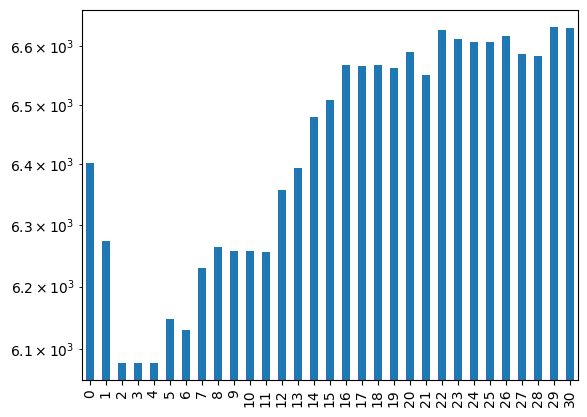

In [685]:
pd.DataFrame(result_dict.items())[1].plot(kind="bar", logy=True)

In [658]:
saving_plan.total_worth

7040.922911857702

In [642]:
t.tail(1)["value"].iloc[0].item()

28215.413113654155

In [639]:
a: np.float16 = np.array([1.3])[0]

In [641]:
a.item()

1.3

In [660]:
%%timeit
t = (
    saving_plan.df
    .pipe(saving_plan.select_required_columns)
    .pipe(saving_plan.rename_close)
    .pipe(saving_plan.add_day_of_month)
    .pipe(saving_plan.sort_date)
    .pipe(saving_plan.add_real_day_to_invest)
    .pipe(saving_plan.add_saving)
    .pipe(saving_plan.add_number_of_stocks_bought)
    .pipe(saving_plan.add_number_of_stocks)
    .dropna()
    )

14.6 ms ± 466 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [608]:
def _find_invest_day(x: pd.Series, day: int) -> int:
    # Perform a binary search to find the index where the target day should be inserted
    idx = np.searchsorted(x, day, side='left')
    
    # If the index is within bounds, return the next day, otherwise wrap around
    if idx < len(x):
        return x.iloc[idx]
    else:
        return x.iloc[-1] 


In [611]:
t.groupby(pd.Grouper(freq="1ME"))["day_of_month"].transform(_find_invest_day, day=2)

Date
2022-01-03 05:00:00    3
2022-01-04 05:00:00    3
2022-01-05 05:00:00    3
2022-01-06 05:00:00    3
2022-01-07 05:00:00    3
                      ..
2024-08-26 04:00:00    2
2024-08-27 04:00:00    2
2024-08-28 04:00:00    2
2024-08-29 04:00:00    2
2024-08-30 04:00:00    2
Name: day_of_month, Length: 667, dtype: int32

In [505]:
t.tail(1)

,price,day_of_month,date_year_month,day_to_invest,invest_amount,number_of_stocks_bought,number_of_stocks,value
Date,,,,,,,,
2024-08-22 04:00:00,3607.600098,22,2024-08,22,750.0,0.207894,8.199922,29582.039125


In [438]:
t.head(50)

,price,day_of_month,date_year_month,day_to_invest,invest_amount,number_of_stocks_bought,number_of_stocks,value
Date,,,,,,,,
2000-01-25 00:00:00-05:00,1357.099976,25,2000-01,25,100.0,0.073687,0.073687,100.000000
2000-02-25 00:00:00-05:00,1337.900024,25,2000-02,25,100.0,0.074744,0.148431,198.585222
2000-03-27 00:00:00-05:00,1447.900024,27,2000-03,27,100.0,0.069066,0.217496,314.912581
2000-04-25 00:00:00-04:00,1363.300049,25,2000-04,25,100.0,0.073351,0.290848,396.512418
2000-05-25 00:00:00-04:00,1300.400024,25,2000-05,25,100.0,0.076899,0.367747,478.218103
2000-06-26 00:00:00-04:00,1365.699951,26,2000-06,26,100.0,0.073223,0.440969,602.231950
2000-07-25 00:00:00-04:00,1369.500000,25,2000-07,25,100.0,0.073019,0.513989,703.907655
2000-08-25 00:00:00-04:00,1378.699951,25,2000-08,25,100.0,0.072532,0.586521,808.636327
2000-09-25 00:00:00-04:00,1309.500000,25,2000-09,25,100.0,0.076365,0.662886,868.049110


In [413]:
t.tail(60)

,price,day_of_month,date_year_month,day_to_invest,invest_amount,number_of_stocks_bought,number_of_stocks
Date,,,,,,,
2010-01-25 00:00:00-05:00,1149.199951,25,2010-01,25,100.0,11.492,1401.121996
2010-02-24 00:00:00-05:00,1131.699951,24,2010-02,24,100.0,11.317,1412.438995
2010-03-24 00:00:00-04:00,1190.300049,24,2010-03,24,100.0,11.903,1424.341996
2010-04-26 00:00:00-04:00,1228.599976,26,2010-04,26,100.0,12.286,1436.627996
2010-05-24 00:00:00-04:00,1064.000000,24,2010-05,24,100.0,10.640,1447.267996
2010-06-24 00:00:00-04:00,1082.400024,24,2010-06,24,100.0,10.824,1458.091996
2010-07-26 00:00:00-04:00,1129.800049,26,2010-07,26,100.0,11.298,1469.389996
2010-08-24 00:00:00-04:00,1079.000000,24,2010-08,24,100.0,10.790,1480.179996
2010-09-24 00:00:00-04:00,1183.000000,24,2010-09,24,100.0,11.830,1492.009996


In [155]:
a = pd.DataFrame(t.groupby(pd.Grouper(freq="1ME"))["day_of_month"].unique())

a.day_of_month.apply(lambda x: x[np.argmax((x + 8) / 2 >= 8)])

Date
1972-01-31 00:00:00-05:00    10
1972-02-29 00:00:00-05:00     8
1972-03-31 00:00:00-05:00     8
1972-04-30 00:00:00-05:00    10
1972-05-31 00:00:00-04:00     8
                             ..
2024-05-31 00:00:00-04:00     8
2024-06-30 00:00:00-04:00    10
2024-07-31 00:00:00-04:00     8
2024-08-31 00:00:00-04:00     8
2024-09-30 00:00:00-04:00     3
Freq: ME, Name: day_of_month, Length: 633, dtype: int32